# 7. Networks with incomplete data

This notebook shows how to use the '--regularized' flag in Infomap. It helps prevent the detection of spurious modules in networks, especially when dealing with incomplete data, such as missing links or inaccurate link weights.

In [1]:
%matplotlib inline

from infomap import Infomap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette(sns.color_palette("colorblind"))

#### Here, we use a synthetic network with 100 nodes and an average node degree 14.5. The network has 3 planted modules.

In [3]:
# First, we explore communities that Infomap detects in the network when all links are provided.

G = nx.read_edgelist("data/VII_network_complete.dat", nodetype=int)
pos = nx.spring_layout(G)

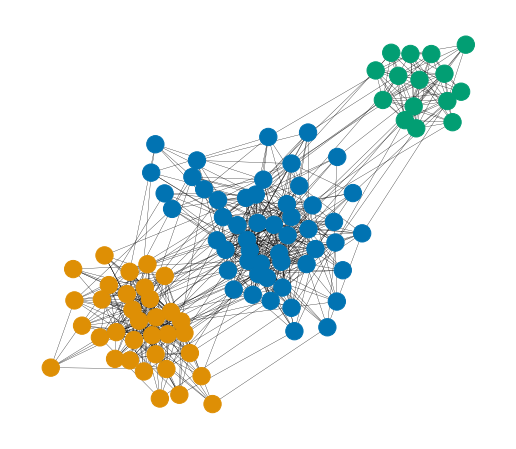

In [4]:
# Infomap detects planted modules accurately. 

im = Infomap(silent = True, two_level = True, num_trials = 10)
im.add_networkx_graph(G)
im.run()

nodelist = G.nodes
modules = dict(im.modules)

fig, ax = plt.subplots(1, 1, figsize = (9,8))
nx.draw(G, pos = pos, ax = ax, node_color = [sns.color_palette()[modules[node]-1] for node in nodelist], width = 0.3)
ax.axis("off")
plt.show()

Here, we compare partitions Infomap detects in the network after removing a fraction of links randomly, with and without the flag 'regularized'. We can control the strength of the prior by using 'regularization_strength'. In this small network, we set 'regularization_strength' to 0.7; for larger networks (>300 nodes), we suggest using the default value of 1.

In [5]:
# The network after 50% of the links were removed.

G_50 = nx.read_edgelist("data/VII_network_incomplete_50.dat", nodetype=int)

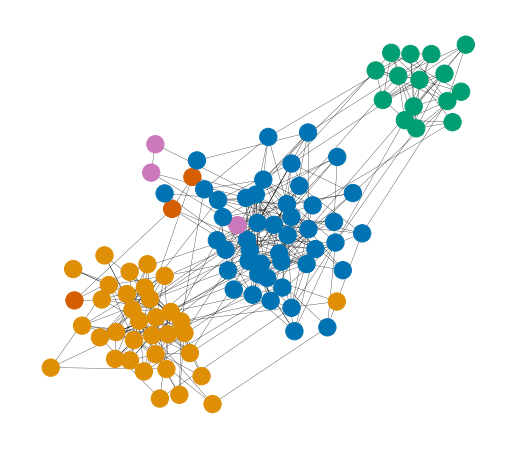

In [6]:
# The standard map equation can overfit to the noise and detect small spurious modules.

im = Infomap(silent = True, two_level = True, num_trials = 10)
im.add_networkx_graph(G_50)
im.run()

nodelist = G_50.nodes
modules = dict(im.modules)

fig, ax = plt.subplots(1, 1, figsize = (9,8))
nx.draw(G_50, pos = pos, ax = ax, node_color = [sns.color_palette()[modules[node]-1] for node in nodelist], width = 0.3)
ax.axis("off")
plt.show()

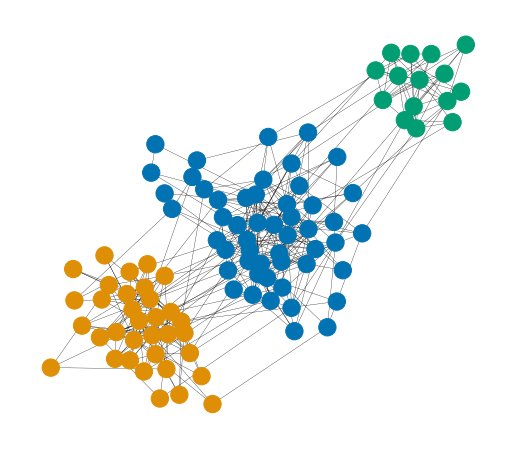

In [7]:
# The regularized map equation prevents overfitting and detects planted modules.

im = Infomap(silent = True, two_level = True, num_trials = 10, regularized=True, regularization_strength=0.7)
im.add_networkx_graph(G_50)
im.run()

nodelist = G_50.nodes
modules_regularized = dict(im.modules)

fig, ax = plt.subplots(1, 1, figsize = (9,8))
nx.draw(G_50, pos = pos, ax = ax, node_color = [sns.color_palette()[modules_regularized[node]-1] for node in nodelist], width = 0.3)
ax.axis("off")
plt.show()

In this example, 70% of the links are removed. With only 30% of links left, the network structure doesn't reveal evidence of planted communities.

In [8]:
# The network after 70% of the links were removed.

G_30 = nx.read_edgelist("data/VII_network_incomplete_30.dat", nodetype=int)

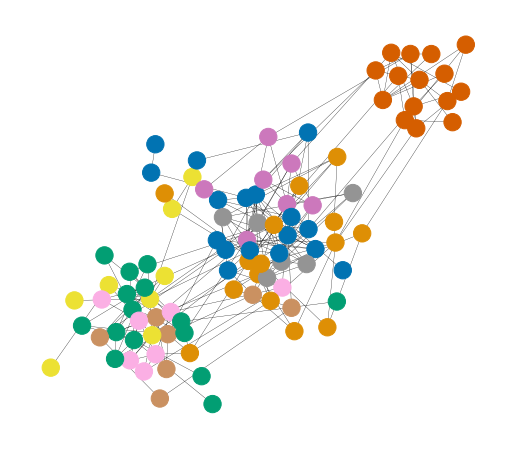

In [9]:
# The standard map equation overfits to the noise and detects many small spurious modules.

im = Infomap(silent = True, two_level = True, num_trials = 10)
im.add_networkx_graph(G_30)
im.run()

nodelist = G_30.nodes
modules = dict(im.modules)

fig, ax = plt.subplots(1, 1, figsize = (9,8))
nx.draw(G_30, pos = pos, ax = ax, node_color = [sns.color_palette()[modules[node]-1] for node in nodelist], width = 0.3)
ax.axis("off")
plt.show()

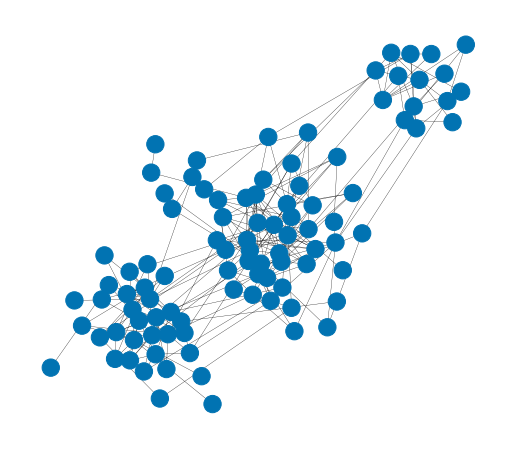

In [10]:
# The regularized map equation detects no modules if the network structure is too sparse.

im = Infomap(silent = True, two_level = True, num_trials = 10, regularized=True, regularization_strength=0.7)
im.add_networkx_graph(G_30)
im.run()

nodelist = G_30.nodes
modules_regularized = dict(im.modules)

fig, ax = plt.subplots(1, 1, figsize = (9,8))
nx.draw(G_30, pos = pos, ax = ax, node_color = [sns.color_palette()[modules_regularized[node]-1] for node in nodelist], width = 0.3)
ax.axis("off")
plt.show()